What we need is a small parcel to work on, with a nice contourplot with critical points and minima found after initiating local method and then a 3d plot. 

In [1]:
using Globtim
include("../src/lib_func.jl")

# Constants and Parameters
d = 20 # Initial Degree 
const n, a, b = 2, 1, 5 
const scale_factor = a / b       # Scaling factor appears in `main_computation`, maybe it should be a parameter.
const delta, alpha = .9 , 8 / 10  # Sampling parameters
const tol_l2 = 3e-4             # Define the tolerance for the L2-norm

f = tref # Objective function

tref (generic function with 1 method)

We need to also return the number of samples used to generate the sample set. It is annoying that the error goes up while the degree has increased.

In [2]:
while true # Potential infinite loop
    global poly_approx = MainGenerate(f, 2, d, delta, alpha, scale_factor, 0.2) # computes the approximant in Chebyshev basis
    if poly_approx.nrm < tol_l2
        println("attained the desired L2-norm: ", poly_approx.nrm)
        break
    else
        println("current L2-norm: ", poly_approx.nrm)
        println("Number of samples: ", poly_approx.N)
        global d += 1
    end
end

current L2-norm: 0.0006848491079457117
Number of samples: 68
current L2-norm: 0.0005722005723113409
Number of samples: 74
current L2-norm: 0.00041310152066245366
Number of samples: 80
current L2-norm: 0.000373256439057106
Number of samples: 85
current L2-norm: 0.00033493901855887294
Number of samples: 91
current L2-norm: 0.0003076155566746372
Number of samples: 97
attained the desired L2-norm: 0.00028654129843355897


We now expand the approximant computed in the tensorized Chebyshev basis into standard monomial basis.

In [3]:
using DynamicPolynomials, HomotopyContinuation, ProgressLogging, DataFrames
@polyvar(x[1:n]) # Define polynomial ring 
ap = main_nd(n, d, poly_approx.coeffs) 
# Expand the polynomial approximant to the standard monomial basis in the Lexicographic order w.r.t x. 
PolynomialApproximant = sum(ap .* MonomialVector(x, 0:d))
grad = differentiate.(PolynomialApproximant, x)
sys = System(grad)

Check


System of length 2
 2 variables: x₁, x₂

 23.4256758228912 + 108.12834325195*x₁ - 3.43370307579442e-14*x₂ + 8.0000000000003*x₂*x₁ + 3.00341867877815e-12*x₂*x₁^2 - 5.33333333334274*x₂*x₁^3 - 5.32257704243755e-11*x₂*x₁^4 + 1.0666666667856*x₂*x₁^5 + 3.96261928584783e-10*x₂*x₁^6 - 0.101587302398443*x₂*x₁^7 - 1.51406201041852e-09*x₂*x₁^8 + 0.00564374207049542*x₂*x₁^9 + 3.16101395283213e-09*x₂*x₁^10 - 0.000205233180266717*x₂*x₁^11 - 3.01216221313818e-09*x₂*x₁^12 + 5.26706479674749e-06*x₂*x₁^13 - 1.61727750711059e-09*x₂*x₁^14 - 9.43387447413775e-08*x₂*x₁^15 + 8.85257804075871e-09*x₂*x₁^16 - 1.59209122487455e-08*x₂*x₁^17 - 1.22100645128765e-08*x₂*x₁^18 + 1.68699178776379e-08*x₂*x₁^19 + 8.86223191585498e-09*x₂*x₁^20 - 7.64080758158569e-09*x₂*x₁^21 - 3.42698710587656e-09*x₂*x₁^22 + 1.33342116991479e-09*x₂*x₁^23 + 5.5861850440329e-10*x₂*x₁^24 + 2.42195120656041e-13*x₂^2*x₁ - 7.99999999999215*x₂^2*x₁^2 - 2.29119291800395e-11*x₂^2*x₁^3 + 2.66666666662286*x₂^2*x₁^4 + 6.12551377582443e-10*x₂^2*x₁^5 -

Solve the system of partial derivatives using HomotopyContinuation. Note that without the conversion to floating point coefficients, there is an issue if we try to use BigFloats directly. 

In [4]:
Real_sol_lstsq = HomotopyContinuation.solve(sys)
real_pts = HomotopyContinuation.real_solutions(Real_sol_lstsq; only_real=true, multiple_results=false)

Computing mixed cells... 4    Time: 0:00:00
Computing mixed cells... 20    Time: 0:00:00
  mixed_volume:  625


Tracking 625 paths...   0%|▏                            |  ETA: 2:51:55



Tracking 625 paths...   8%|██▎                          |  ETA: 0:06:52



Tracking 625 paths...  12%|███▍                         |  ETA: 0:04:21



Tracking 625 paths...  15%|████▍                        |  ETA: 0:03:16



Tracking 625 paths...  19%|█████▍                       |  ETA: 0:02:33



Tracking 625 paths...  22%|██████▎                      |  ETA: 0:02:08



Tracking 625 paths...  25%|███████▎                     |  ETA: 0:01:47



Tracking 625 paths...  29%|████████▎                    |  ETA: 0:01:29



Tracking 625 paths...  32%|█████████▍                   |  ETA: 0:01:15



Tracking 625 paths...  36%|██████████▍                  |  ETA: 0:01:04



Tracking 625 paths...  39%|███████████▍                 |  ETA: 0:00:56



Tracking 625 paths...  43%|████████████▍                |  ETA: 0:00:48



Tracking 625 paths...  46%|█████████████▌               |  ETA: 0:00:42



Tracking 625 paths...  50

155-element Vector{Vector{Float64}}:
 [0.8783232514855495, 0.4405478843636873]
 [-0.9527938313234043, -1.0751172334889374]
 [-0.7731116379389494, -0.6963738817873624]
 [0.5843833601648261, -0.7082098475889859]
 [-0.12109644555148166, -1.075133599877583]
 [-0.11757055995207658, 1.0758111279470366]
 [-0.6214628568645719, 1.0756885488259025]
 [0.1356750289040607, 0.6448343751118322]
 [0.716274322885788, -1.0749322113180506]
 [-0.9536736396535239, -1.008161256493493]
 ⋮
 [-0.40496353677627606, -0.6987077705237122]
 [0.8087752619386367, 0.638448077578621]
 [-0.10818336392520136, -0.25408572865923285]
 [-0.6183339427590769, 0.6511818054378724]
 [-0.9433159203398961, 0.42856367781362137]
 [-0.41672484505929913, 0.06570760477405481]
 [0.973132029967733, -0.4684805976976409]
 [-0.11049377025816275, 0.6478379159771865]
 [0.7561762461819477, -0.46659715550981523]

Sort through the critical points, make sure they fall into the domain of definition. Make them into a Dataframe.

In [5]:
condition(point) = -1 < point[1] < 1 && -1 < point[2] < 1
filtered_points = filter(condition, real_pts) # Filter points using the filter function
# Colllect the critical points of the approximant 
h_x = Float64[point[1] for point in filtered_points] # Initialize the x vector for critical points of approximant
h_y = Float64[point[2] for point in filtered_points] # Initialize the y vector
h_z = map(p -> f([p[1], p[2]]), zip(scale_factor * h_x, scale_factor * h_y))
df = DataFrame(x=scale_factor * h_x, y=scale_factor * h_y, z= h_z) # Create a DataFrame

112×3 DataFrame
 Row │ x           y            z          
     │ Float64     Float64      Float64    
─────┼─────────────────────────────────────
   1 │  0.175665    0.0881096    2.09031
   2 │ -0.154622   -0.139275     3.33014
   3 │  0.116877   -0.141642     3.64123
   4 │  0.027135    0.128967     1.15039
   5 │ -0.0824526  -0.049963     4.95134
   6 │ -0.160041    0.169209     2.9459
   7 │ -0.187889    0.169223     2.34945
   8 │  0.132425    0.044678     0.101874
  ⋮  │     ⋮            ⋮           ⋮
 106 │ -0.0216367  -0.0508171    1.25506
 107 │ -0.123667    0.130236    -1.10227
 108 │ -0.188663    0.0857127    2.42784
 109 │ -0.083345    0.0131415    3.30956
 110 │  0.194626   -0.0936961   -1.01627
 111 │ -0.0220988   0.129568    -2.91609
 112 │  0.151235   -0.0933194   -0.581654
                            97 rows omitted

┌ Warning: attempting to remove probably stale pidfile
│   path = /home/georgy/.jlassetregistry.lock
└ @ Pidfile /home/georgy/.julia/packages/Pidfile/DDu3M/src/Pidfile.jl:260


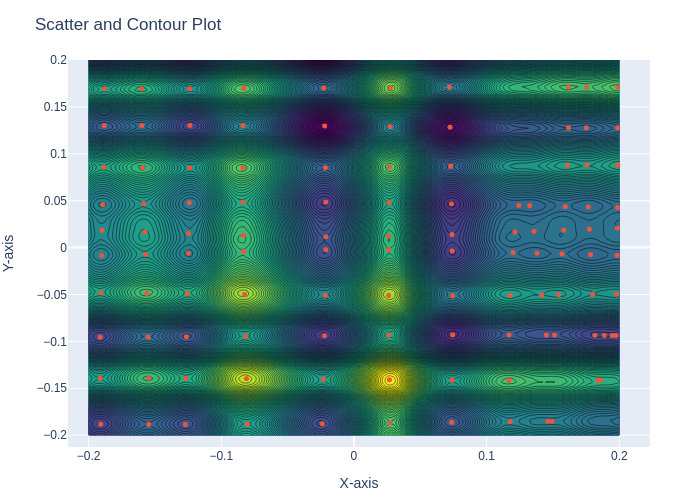

In [6]:
using PlotlyJS, Colors
# Generate the grid and evaluate the function
N = 100  # resolution of the grid
x = range(-scale_factor, scale_factor, length=N)
y = range(-scale_factor, scale_factor, length=N)
z = [tref([xi, yi]) for yi in y, xi in x]

#Scatter plot the critical points of the approximant
scatter_traces = [scatter(x=df.x, y=df.y, mode="markers", marker_size=5, name="Critical Points")]

# Create the contour plot
cp = contour(x=x, y=y, z=z, ncontours=100, colorscale="Viridis", showscale=false)

# Combine contour plot and scatter traces
all_traces = [cp; scatter_traces...]

# Customize layout to handle legend groups
layout = Layout(
    title="Scatter and Contour Plot",
    xaxis_title="X-axis",
    yaxis_title="Y-axis",
    legend=(tracegroupgap=10, groupclick="toggleitem"),
    height=800 # Increase the height to make room for the legend 
)

# Display the combined plot with legend
display(plot(all_traces, layout))



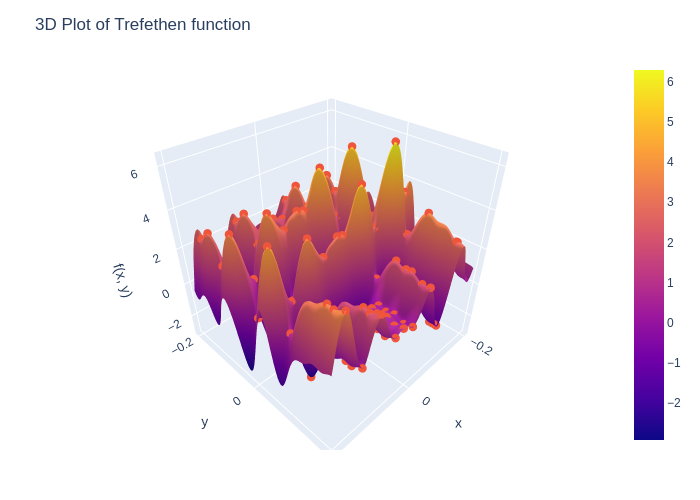

In [7]:
sf = surface(x=x, y=y, z=z)
# Had to switch the coordinates of the critical points to match the surface plot for some reason. 
crit_pts = scatter3d(x=df.y, y=df.x, z=df.z, mode="markers", marker_size=5, name="Critical Points")

# Layout for the plot
layout = Layout(title="3D Plot of Trefethen function",
    scene=attr(
        xaxis_title="x",
        yaxis_title="y",
        zaxis_title="f(x, y)"),
        height=800
)
# Display the plot layout,
plt = plot([sf, crit_pts], layout)

In [8]:
# Save the plot as an HTML file to preserve the animation
savefig(plt, "trefethen_function_plot.html")

"trefethen_function_plot.html"